<a href="https://colab.research.google.com/github/LeyloJohnny/Computational-Neuroscience/blob/main/HMM_new_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HMM Analysis

### Access and understand data

Get data files:

In [1]:
#get data from google drive
!gdown --id 1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
#unzip data
!unzip 'NewData.zip'

Downloading...
From: https://drive.google.com/uc?id=1qblO7uQCJ6KKclqS-rhvXfQ7ccWcmxaA
To: /content/NewData.zip
127MB [00:01, 75.8MB/s]
Archive:  NewData.zip
  inflating: Cluster.pkl             
  inflating: BN.pkl                  
  inflating: SFA.pkl                 


Get a list of data for all three models:

In [2]:
import pickle

#create a list of model name strings
models = ['BN.pkl', "SFA.pkl", "Cluster.pkl"]

#create a list of model names
model_names = ["Balanced Network", "Clustered with SFA", "Clustered wo SFA"]

#create lists to store model data
models_x = []
models_y = []

#for all models
for i in range(len(models)):

  #open pickle file
  with open(models[i], 'rb') as f:
    #get x (actual data: time * neuron id)
    x = pickle.load(f)
    #get y (information on data, such as inhibitory/excitatory neurons, clusters, etc.)
    y = pickle.load(f)
    #add x and y to the models lists
    models_x.append(x)
    models_y.append(y)

###Extract certain time range

In [3]:
import numpy as np
import pandas as pd

time_range_models = []

time_range = 5000

for model in range(len(models)):
  #set condition: returns True for time <= 5 s
  condition = [True if i <= time_range else False for i in models_x[model][0]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, models_x[model][0])
  new_y = np.extract(condition, models_x[model][1])

  new = [new_x, new_y]

  #time_range_x.append(new_x)
  #time_range_y.append(new_y)

  time_range_models.append(new)

### Create raster plots from data for one cluster

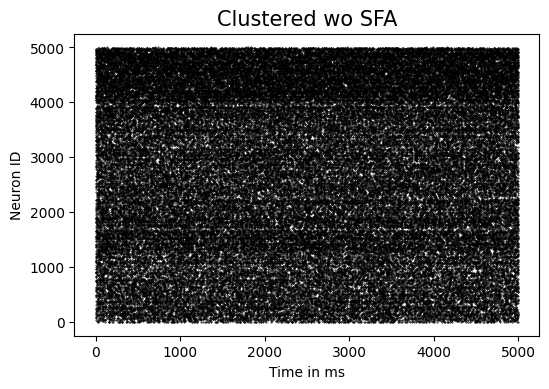

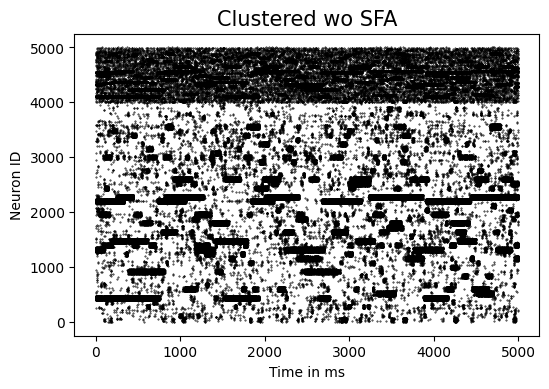

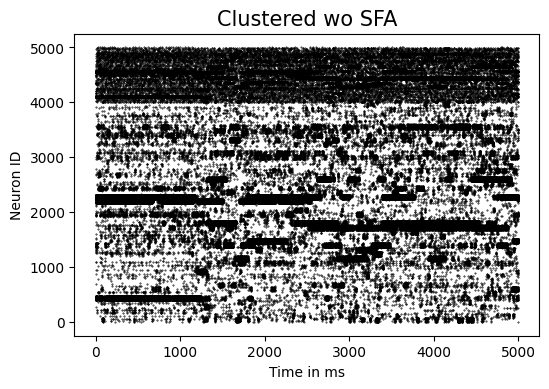

In [4]:
import matplotlib.pyplot as plt

one_cluster = []

neuron_ID = 0

for model in range(len(models)):

  condition = [True if i > neuron_ID and i <= neuron_ID+5000 else False for i in time_range_models[model][1]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, time_range_models[model][0])
  new_y = np.extract(condition, time_range_models[model][1])

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(new_x,new_y,'.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[i], fontsize = 15)

  new = [new_x, new_y]

  one_cluster.append(new)

### Create spike count matrix

In [7]:
neurons = [51, 52, 53, 
           151, 156, 157, 
           171, 173, 185, 
           250, 251, 317, 
           331, 360, 390, 
           402, 404, 407, 
           540, 541, 550, 
           590, 609, 621, 
           651, 655, 692,
           737, 755, 784,
           809, 812, 851,
           891, 930, 950,
           963, 1001, 1018,
           1041, 1059, 1081,
           1122, 1131, 1170, 
           1211, 1273, 1278,
           1287, 1290, 1328,
           1361, 1380, 1390, 
           1479, 1490, 1519,
           1567, 1574, 1581,
           1648, 1649, 1650,
           1751, 1752, 1753,
           1837, 1838, 1839, 
           1871, 1872, 1873,
           1996, 1997, 1998,
           2027, 2028, 2029,
           2084, 2088, 2094,
           2228, 2229, 2230, 
           2317, 2318, 2319, 
           2354, 2355, 2377,
           2461, 2462, 2463,
           2532, 2533, 2535, 
           2625, 2627, 2628,
           2659, 2670, 2667, 
           2725, 2736, 2773, 
           2814, 2816, 2858, 
           2910, 2912, 2914, 
           3035, 3036, 3037,
           3116, 3117, 3118, 
           3164, 3165, 3166, 
           3263, 3264, 3267, 
           3299, 3300, 3301,
           3416, 3417, 3418,
           3485, 3487, 3490, 
           3522, 3523, 3524, 
           3641, 3651, 3657, 
           3688, 3694, 3740,
           3766, 3782, 3802,
           3882, 3887, 3995, 
           3932, 3934, 3949]

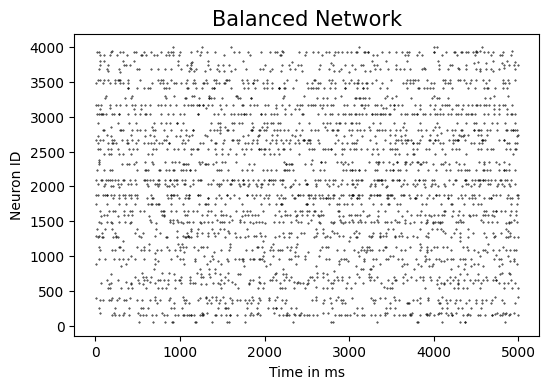

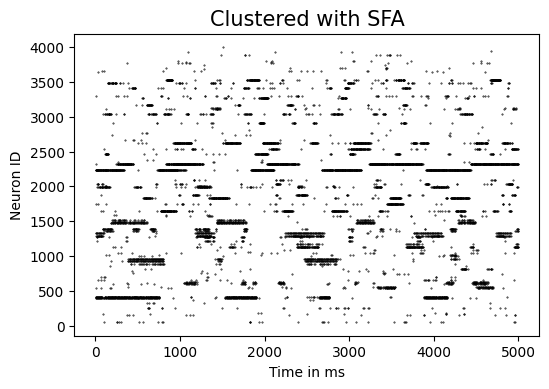

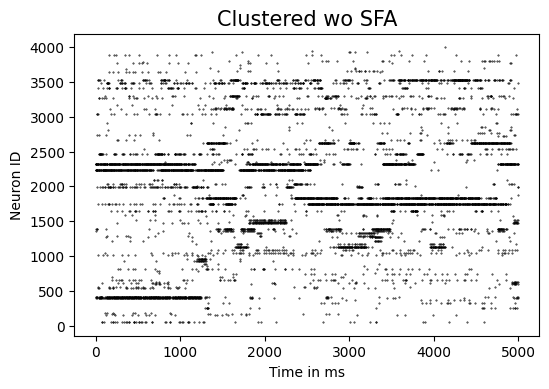

In [36]:
import matplotlib.pyplot as plt

three_neurons_per_cluster = []

for model in range(len(models)):

  condition = [True if i in neurons else False for i in time_range_models[model][1]]

  #extract new x and y values for array based on condition
  new_x = np.extract(condition, time_range_models[model][0])
  new_y = np.extract(condition, time_range_models[model][1])

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(new_x, new_y, '.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[model], fontsize = 15)

  new = [new_x, new_y]
  new_array = np.array(new)

  three_neurons_per_cluster.append(new_array)

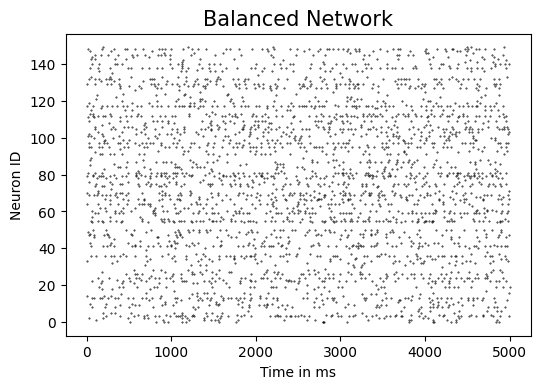

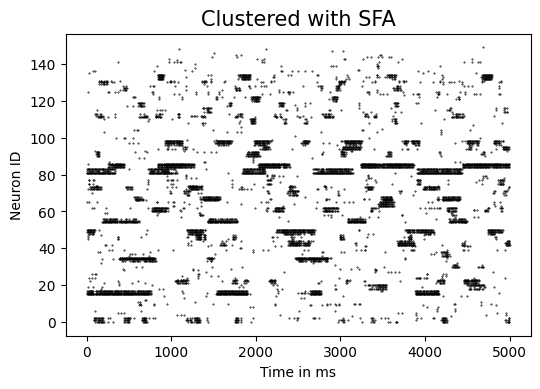

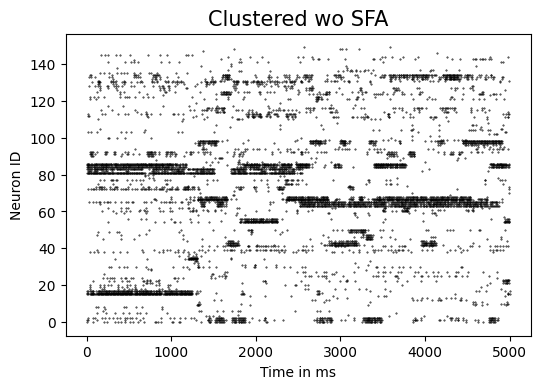

In [56]:
new_neuron_IDs = range(150)

for model in range(len(models)):

  for neuron in range(len(neurons)):

    three_neurons_per_cluster[model][np.where(three_neurons_per_cluster[model] == neurons[neuron])] = new_neuron_IDs[neuron]

  #create figure
  figure = plt.figure(dpi=100)
  #create subplot
  ax = figure.add_subplot(1,1,1)
  #plot both dimensions of x (time, neuron id)
  plt.plot(three_neurons_per_cluster[model][0], three_neurons_per_cluster[model][1], '.k',markersize = 0.8) 

  #label the plot
  ax.set_xlabel('Time in ms', fontsize = 10)
  ax.set_ylabel('Neuron ID', fontsize = 10)
  ax.set_title(model_names[model], fontsize = 15)

In [73]:
import numpy as np

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(three_neurons_per_cluster[i][0]+ 1)/window)

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix = np.zeros((len(models), intervals, len(neurons)))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(three_neurons_per_cluster[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, len(neurons)))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(len(neurons)):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == new_neuron_IDs[k])

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix[i] = spike_counts

np.save(file_name, spike_count_matrix)

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix.shape) + " representing " + 
      str(spike_count_matrix.shape[0]) + " models, " + str(spike_count_matrix.shape[1]) + " intervals, and " + str(spike_count_matrix.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix)

We have 100 intervals, each 50ms long. 

The spike count matrix has the shape: (3, 100, 150) representing 3 models, 100 intervals, and 150 neurons. 

Spike count matrix: 

[[[0. 0. 1. ... 1. 1. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [1. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 3. 1. ... 0. 0. 0.]
  [4. 3. 6. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [5. 3. 2. ... 0. 0. 0.]]

 [[1. 2. 1. ... 0. 0. 0.]
  [1. 0. 2. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 2. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [74]:
#define titles for columns and rows in the dataframe that will be generated from the spike count matrix
cols = ['Neuron{}'.format(int(col+1)) for col in range(len(neurons))] #rows represent the neurons (= features)
rows = ['Interval{}'.format(int(row+1)) for row in range(intervals)] #columns represent the time intervals/time bins (= samples)

#create list for the data to be analyzed for each model
models_data = []

#for every model
for i in range(len(models)):
  #create a dataframe from the spike count matrix
  current = spike_count_matrix[i]
  data = pd.DataFrame(data = current, index = rows, columns = cols)
  #add the dataframe to the list (containing one dataframe per model)
  models_data.append(data)

#exemplarily show the dataframe for the second model
models_data[2].head(intervals)

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron111,Neuron112,Neuron113,Neuron114,Neuron115,Neuron116,Neuron117,Neuron118,Neuron119,Neuron120,Neuron121,Neuron122,Neuron123,Neuron124,Neuron125,Neuron126,Neuron127,Neuron128,Neuron129,Neuron130,Neuron131,Neuron132,Neuron133,Neuron134,Neuron135,Neuron136,Neuron137,Neuron138,Neuron139,Neuron140,Neuron141,Neuron142,Neuron143,Neuron144,Neuron145,Neuron146,Neuron147,Neuron148,Neuron149,Neuron150
Interval1,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,5.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Interval5,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Interval96,3.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
Interval97,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval98,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [75]:
silent_neurons = []
all_models_silent = []

for model in range(len(models)):
  model_silent_neurons = []
  for neuron in range(len(neurons)):
    if models_data[model].iloc[:, neuron].sum(0) == 0:
      model_silent_neurons.append(neuron+1)
  silent_neurons.append(model_silent_neurons)

In [76]:
len(silent_neurons[0]), len(silent_neurons[1]), len(silent_neurons[2])

(3, 3, 3)

In [77]:
silent_neurons[1]

[52, 53, 54]

In [78]:
for model in range(len(models)):
  for neuron_number in range(len(silent_neurons[model])):
    neuron = silent_neurons[model][neuron_number]
    del models_data[model]["Neuron" + str(neuron)]

In [79]:
models_data[1].head()

,Neuron1,Neuron2,Neuron3,Neuron4,Neuron5,Neuron6,Neuron7,Neuron8,Neuron9,Neuron10,Neuron11,Neuron12,Neuron13,Neuron14,Neuron15,Neuron16,Neuron17,Neuron18,Neuron19,Neuron20,Neuron21,Neuron22,Neuron23,Neuron24,Neuron25,Neuron26,Neuron27,Neuron28,Neuron29,Neuron30,Neuron31,Neuron32,Neuron33,Neuron34,Neuron35,Neuron36,Neuron37,Neuron38,Neuron39,Neuron40,...,Neuron111,Neuron112,Neuron113,Neuron114,Neuron115,Neuron116,Neuron117,Neuron118,Neuron119,Neuron120,Neuron121,Neuron122,Neuron123,Neuron124,Neuron125,Neuron126,Neuron127,Neuron128,Neuron129,Neuron130,Neuron131,Neuron132,Neuron133,Neuron134,Neuron135,Neuron136,Neuron137,Neuron138,Neuron139,Neuron140,Neuron141,Neuron142,Neuron143,Neuron144,Neuron145,Neuron146,Neuron147,Neuron148,Neuron149,Neuron150
Interval1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval2,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval3,4.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval4,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Interval5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
 data_array = []
 for model in range(len(models)): 
  new_array = models_data[model].to_numpy()
  data_array.append(new_array)

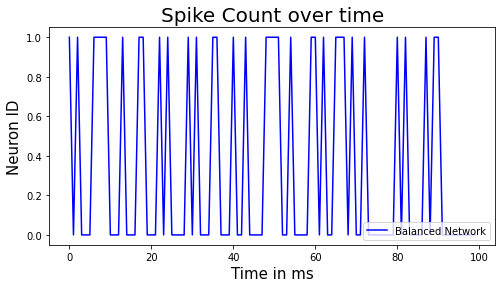

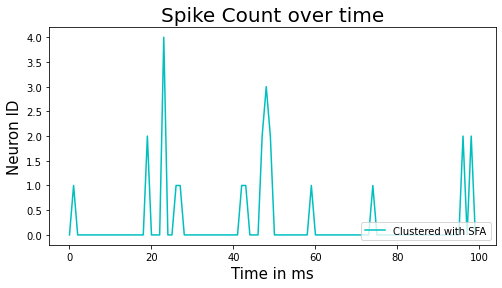

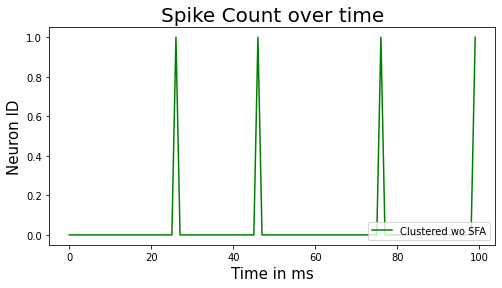

In [81]:
neuron = 70

for model in range(len(models)):

  one_neuron = []

  for timepoint in range(len(spike_count_matrix[model][:])):
    one_neuron.append(spike_count_matrix[model][timepoint][neuron])

  #define figure fig with a certain size
  fig = plt.figure(figsize = (8,4))
  #define axis, two axis, index position = 1
  ax = fig.add_subplot(1,1,1) 
  #set labels and title of figure
  ax.set_xlabel('Time in ms', fontsize = 15)
  ax.set_ylabel('Neuron ID', fontsize = 15)
  ax.set_title('Spike Count over time', fontsize = 20)

  #define colors for different models
  colors = ['b', 'c', 'g']

  #for neuron in range(len(spike_count_matrix[model][0])):

  #plot the data
  ax.plot(range(len(one_neuron)), one_neuron, color = colors[model], label = model_names[model])
  #fill area of positive and negative errors
  plt.legend(loc = "lower right")

In [82]:
!pip install git+git://github.com/lindermanlab/ssm
import ssm

  Cloning git://github.com/lindermanlab/ssm to /tmp/pip-req-build-3jhfz_z5
  Running command git clone -q git://github.com/lindermanlab/ssm /tmp/pip-req-build-3jhfz_z5
  Created wheel for ssm: filename=ssm-0.0.1-cp37-cp37m-linux_x86_64.whl size=400864 sha256=36ec3f13bce153560ead8159c2c4732b8b3e2d3d889ceb928f051ea285d77d0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-nqvgw70e/wheels/82/71/55/886c7f4ed86fbde1aa2f4e598d010b6d9a761be84320ac95ec
Successfully built ssm


In [83]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
import scipy.stats as st
import multiprocessing

import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(3)

import ssm
from ssm.util import find_permutation
from ssm.plots import gradient_cmap, white_to_color_cmap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

color_names=['windows blue','red','amber','faded green','dusty purple','orange','steel blue','pink',
             'greyish','mint','clay','light cyan','forest green','pastel purple','salmon','dark brown',
             'lavender','pale green','dark red','gold','dark teal','rust','fuchsia','pale orange',
             'cobalt blue','mahogany','cloudy blue','dark pastel green','dust','electric lime','fresh green','light eggplant']

colors = sns.xkcd_palette(color_names)
cmap = gradient_cmap(colors)

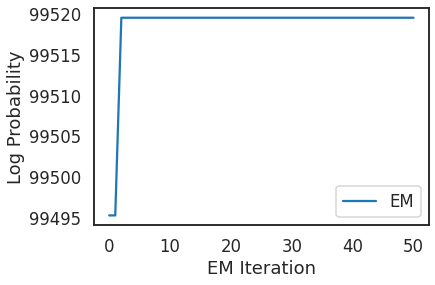

In [96]:
N_iters = 50
num_states = 5    # number of discrete states
obs_dim = int(data_array[1].shape[1])     # dimensionality of observation

##===== Create HMM object to fit =====## 
hmm = ssm.HMM(num_states, obs_dim, observations="gaussian")

#This beautiful line of code hides all the business of fitting Hidden Markov models to data under the hood.
#Go look at the source code and marvel at how code should be written. 
hmm_lls = hmm.fit(data_array[1], method="em", num_iters=N_iters, init_method="kmeans")

#Plot log-likelihood over iterations compared to the baseline log-likelihood we calculated earlier
plt.plot(hmm_lls, label="EM")
plt.xlabel("EM Iteration")
plt.ylabel("Log Probability")
plt.legend(loc="lower right")
plt.show()

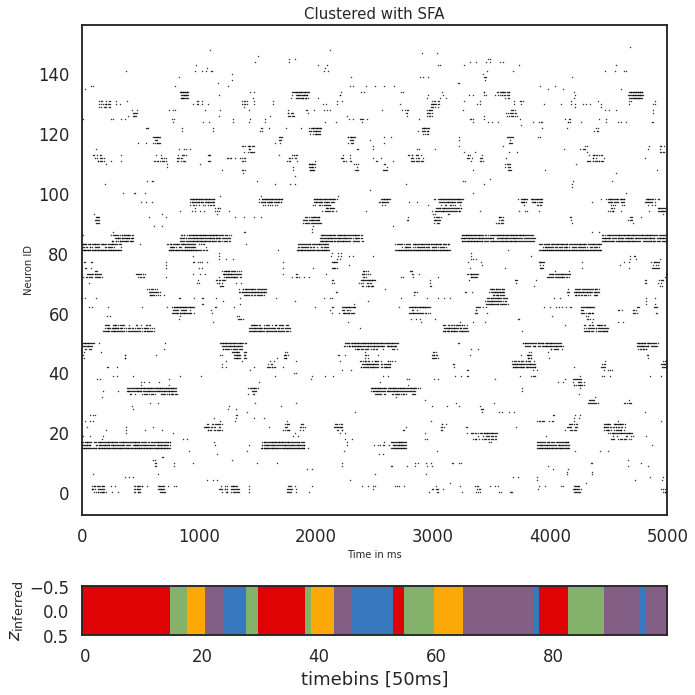

In [104]:
# Plot the true and inferred discrete states
hmm_z = hmm.most_likely_states(data_array[1])

time_bins = intervals

fig, axes = plt.subplots(2,1,figsize=(10, 10),gridspec_kw={'height_ratios':[10,1]})

#create subplot
axes[0].plot(three_neurons_per_cluster[1][0], three_neurons_per_cluster[1][1],'.k',markersize = 0.8) 
#tPlot = 100
#axes[0].imshow(three_neurons_per_cluster[model][1],
           #aspect="auto",
           #cmap='gray_r')

#label the plot
axes[0].set_xlim([0, 5000])
axes[0].set_xlabel('Time in ms', fontsize = 10)
axes[0].set_ylabel('Neuron ID', fontsize = 10)
axes[0].set_title(model_names[1], fontsize = 15)

axes[1].imshow(hmm_z[None,:], aspect="auto", cmap=cmap, vmin=0, vmax=len(colors)-1)
#plt.xlim(0, time_bins)
axes[1].set_ylabel("$z_{\\mathrm{inferred}}$")
axes[1].set_xlabel("timebins [50ms]")

plt.tight_layout()

In [ ]:
'''
import numpy as np

#define a time window (in milliseconds)
window = 50

file_name = "spike_count_matrix_tr_" + str(time_range) + "_tw_" + str(window)

#calculate number of intervals based on recorded time span / time window
intervals = int(np.max(time_range_models[i][0]+ 1)/window)

#define which neurons to focus on 
neurons = 5000

#how many intervals do we have?
print("We have " + str(intervals) + " intervals, each " + str(window) + "ms long. \n")

spike_count_matrix = np.zeros((len(models), intervals, neurons))

#for every model
for i in range(len(models)):
  #get the data of the current model
  current_model_x = np.array(one_cluster[i])

  #create a zeros array with size time * neurons (5000*4000)
  spike_counts = np.zeros((intervals, neurons))

  #for every interval
  for j in range(intervals):

    #get the indices of time points within the current interval
    interval_time_points = np.where(np.logical_and(window*j <= current_model_x[0], current_model_x[0] < window*(j+1)))

    #get data indexed by current interval
    interval_data = current_model_x[1][interval_time_points]
    
    #for every neuron
    for k in range(neurons):

        #get the indices of the current neuron within the defined time interval
        current_neuron = np.where(interval_data == neuron_ID+k)

        #get the number of spikes based on the amount of neuron indices within the defined time interval
        spikes = current_neuron[0].shape[0]

        #add spikes number to spike count matrix
        spike_counts[j, k] = spikes
  
  #add spike count matrix for every model
  spike_count_matrix[i] = spike_counts

np.save(file_name, spike_count_matrix)

#print data
print("The spike count matrix has the shape: " + str(spike_count_matrix.shape) + " representing " + 
      str(spike_count_matrix.shape[0]) + " models, " + str(spike_count_matrix.shape[1]) + " intervals, and " + str(spike_count_matrix.shape[2]) + " neurons. \n")
print("Spike count matrix: \n")
print(spike_count_matrix)
'''